<a href="https://colab.research.google.com/github/joew2k/finance_data/blob/main/IDENTIFYING_AND_APPLYING_DOWNSIDE_RISK_METRICS_ASSOCIATED_WITH_FINANCIAL_MARKETS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
import yfinance as yfin
from scipy import stats

yfin.pdr_override()

## 1. Value at Risk (VaR)

Value at Risk is one of the easiest risk metrics to interpret. So far, the metrics we have introduced quantify risk as a percentage, in the case of standard deviation, or in units, as the Sharpe ratio does. Value at Risk answers the fundamental question many investors have on their mind: How much can I lose on an investment in a worst-case scenario? This is measured in dollars for the purposes of this class.

Value at Risk measures the potential loss in value of an asset/portfolio over a defined time period. Basically, you will always need to specify the time period and confidence interval that accompanies a Value at Risk. For example, if the VaR of a portfolio is \$1,000,000 over a yearly time period with a 99\% confidence interval, it would mean that the portfolio only has a 1\% chance of losing more than \$1,000,000 for any given year. VaR has become ubiquitous over the years; every investment bank and risk management firm is employing some form of VaR to help keep a cap on the potential losses one can incur. The focus on VaR is very much about downside risk unlike something like standard deviation, which looks at both the upside and downside risk.

There are three basic methods for calculating VaR, each with their own advantages and disadvantages. These should build on some of the lessons from earlier, like variance and covariance. Keep in mind that there are countless variations of each basic method, but we will stick with these main three for now:

* Historical Method
* Parametric Method
* Monte Carlo Simulation

## 2. Historical Method

This is probably the simplest and most intuitive method of calculating Value at Risk. In short, historical returns are sorted from lowest to highest on an asset or portfolio. Let's say you wanted to calculate the daily Value at Risk on an equity with a 95% confidence interval. Assuming we can look at the last thousand days of data for this stock, we would take the daily returns and sort them from lowest to highest. From here, we would take the return from the 5th percentile of the data. In this case, with 1,000 days of data, it would be the 50th (0.05*1000) worst daily return from these thousand days. Let's say the 50th worst day had a –4% return. From this, we can assume that the daily VaR for this stock with a 95% confidence interval is –4%. Building on that, if we were to invest \$1,000 in said stock, we would expect the worst daily loss to be:

-0.04*1000 = -\$40  with a 95% confidence interval

Considerations for this method:

* This method uses historical returns to measure VaR empirically, which means that there are no assumptions made about the distribution whereas many models assume the normal distribution.
* Each day for this method is given equal weight, which means if there is a trend in the volatility, you could be overstating or understating the VaR depending on whether the volatility trend is down or up, respectively. One refinement to combat this could be to place greater weight on more recent data.
* Past data does not necessarily indicate what will happen in the future. While the other methods also rely on historical data to a certain extent, this method is solely derived from past historical returns. There are many unforeseen events that can happen, which can change the course of a stock's trajectory and cause the stock to trade differently than it did in the past.



### 2.1 Implementing Value at Risk (VaR) - Historical Method

Calculating daily historical VaR can be done pretty simply in Python. The order of steps needed is as follows:
1. Calculate all daily returns.
2. Sort these returns from least to greatest.
3. Based on a given confidence level, return the corresponding percentile return. In other words, if we want to calculate daily VaR at a 95% confidence level and we are using 100 data points, the 5th smallest return of that sample would be considered our 95% VaR.

Let's visualize this first with a histogram using Bitcoin.

In [3]:
start = datetime.date(2016, 1, 1)
end = datetime.date(2021, 11, 28)

prices= pd.DataFrame(web.DataReader(["BTC-USD"], start, end)["Adj Close"])
returns = prices.pct_change()
returns = returns.rename(columns = {"Adj Close": "Bitcoin"})
returns=returns.dropna()

[*********************100%***********************]  1 of 1 completed


<Axes: ylabel='Count'>

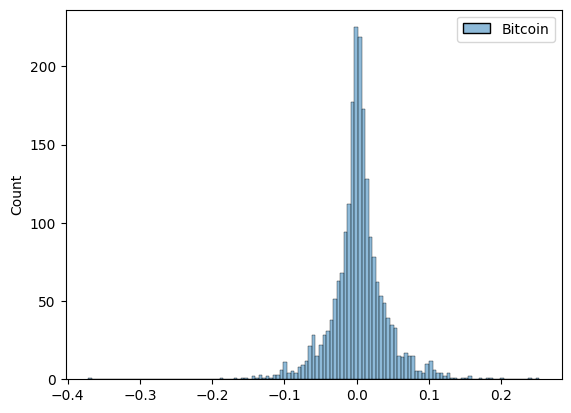

In [4]:
sns.histplot(data=returns)

it may be hard to see but the graoh shows a lot more on the left of 0 than the right side of the 0, indicating there may have been some big looses over the last 5 years.

In [6]:
def getHistoricalVar(returns, confidenceLevel):
  var = 100 * np.percentile(returns, 100 - confidenceLevel)
  print("with %.2f%% confidence, we can say the most our portfolio will lose in a day is %.3f%% using historical VaR"%(confidenceLevel, var))